## Missing values in `year`

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

scriptum_df = pd.read_json("https://raw.githubusercontent.com/CCS-ZCU/scriptum/refs/heads/master/data/files_df.json")


In [12]:
def percentage(m,n):
    return round(m/n*100, 3)

N = scriptum_df.shape[0]
num_missing_year = scriptum_df[scriptum_df.year.isna()].shape[0]
num_missing_year_samizdat = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="samizdat")].shape[0]
num_missing_year_exil = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="exil")].shape[0]

print('\tMissing year')
print(f'Overall: {num_missing_year} -- {percentage(num_missing_year, N)}%')
print(f'Samizdat: {num_missing_year_samizdat} -- {percentage(num_missing_year_samizdat, N)}%')
print(f'Exil: {num_missing_year_exil} -- {percentage(num_missing_year_exil, N)}%')

	Missing year
Overall: 1144 -- 9.85%
Samizdat: 236 -- 2.032%
Exil: 908 -- 7.818%


In [13]:
# Extract year from filename for rows with no year
mask = scriptum_df['year'].isna()
for idx in scriptum_df[mask].index:
    filename = scriptum_df.at[idx, 'filename']
    if match := re.search(r"\d{4}(?!\d)", filename):
        scriptum_df.at[idx, 'year'] = float(match.group())

In [14]:
num_missing_year = scriptum_df[scriptum_df.year.isna()].shape[0]
num_missing_year_samizdat = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="samizdat")].shape[0]
num_missing_year_exil = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="exil")].shape[0]

print('\tMissing year')
print(f'Overall: {num_missing_year} -- {percentage(num_missing_year, N)}%')
print(f'Samizdat: {num_missing_year_samizdat} -- {percentage(num_missing_year_samizdat, N)}%')
print(f'Exil: {num_missing_year_exil} -- {percentage(num_missing_year_exil, N)}%')

	Missing year
Overall: 265 -- 2.282%
Samizdat: 229 -- 1.972%
Exil: 36 -- 0.31%


In [15]:
mask = scriptum_df['year'].isna()
for idx in scriptum_df[mask].index:
    filename = scriptum_df.at[idx, 'filename']
    if '88' in filename:
        scriptum_df.at[idx, 'year'] = 1988.0
    elif '89' in filename:
        scriptum_df.at[idx, 'year'] = 1989.0
    elif '87' in filename:
        scriptum_df.at[idx, 'year'] = 1987.0
    elif '51' in filename and scriptum_df.at[idx, 'filename'] == 'novy-brak_05_chybi-str-51_ocr.txt':
        # see https://scriptum.cz/cs/periodika/novy-brak
        scriptum_df.at[idx, 'year'] = 1983.0
    elif '71' in filename:
        # see https://scriptum.cz/cs/periodika/poradni-svitek
       continue
    else:
        continue

scriptum_df.loc[scriptum_df['periodical_title'] == 'Bulletin NMS v Liberci', 'year'] = 1989.0

All alterations seem legible

In [16]:
num_missing_year = scriptum_df[scriptum_df.year.isna()].shape[0]
num_missing_year_samizdat = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="samizdat")].shape[0]
num_missing_year_exil = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="exil")].shape[0]

print('\tMissing year')
print(f'Overall: {num_missing_year} -- {percentage(num_missing_year, N)}%')
print(f'Samizdat: {num_missing_year_samizdat} -- {percentage(num_missing_year_samizdat, N)}%')
print(f'Exil: {num_missing_year_exil} -- {percentage(num_missing_year_exil, N)}%')

	Missing year
Overall: 233 -- 2.006%
Samizdat: 197 -- 1.696%
Exil: 36 -- 0.31%


All alterations seem legible and other can be added manually from https://scriptum.cz/

[Text(0, 0, '0M'),
 Text(0, 10000000, '10M'),
 Text(0, 20000000, '20M'),
 Text(0, 30000000, '30M'),
 Text(0, 40000000, '40M')]

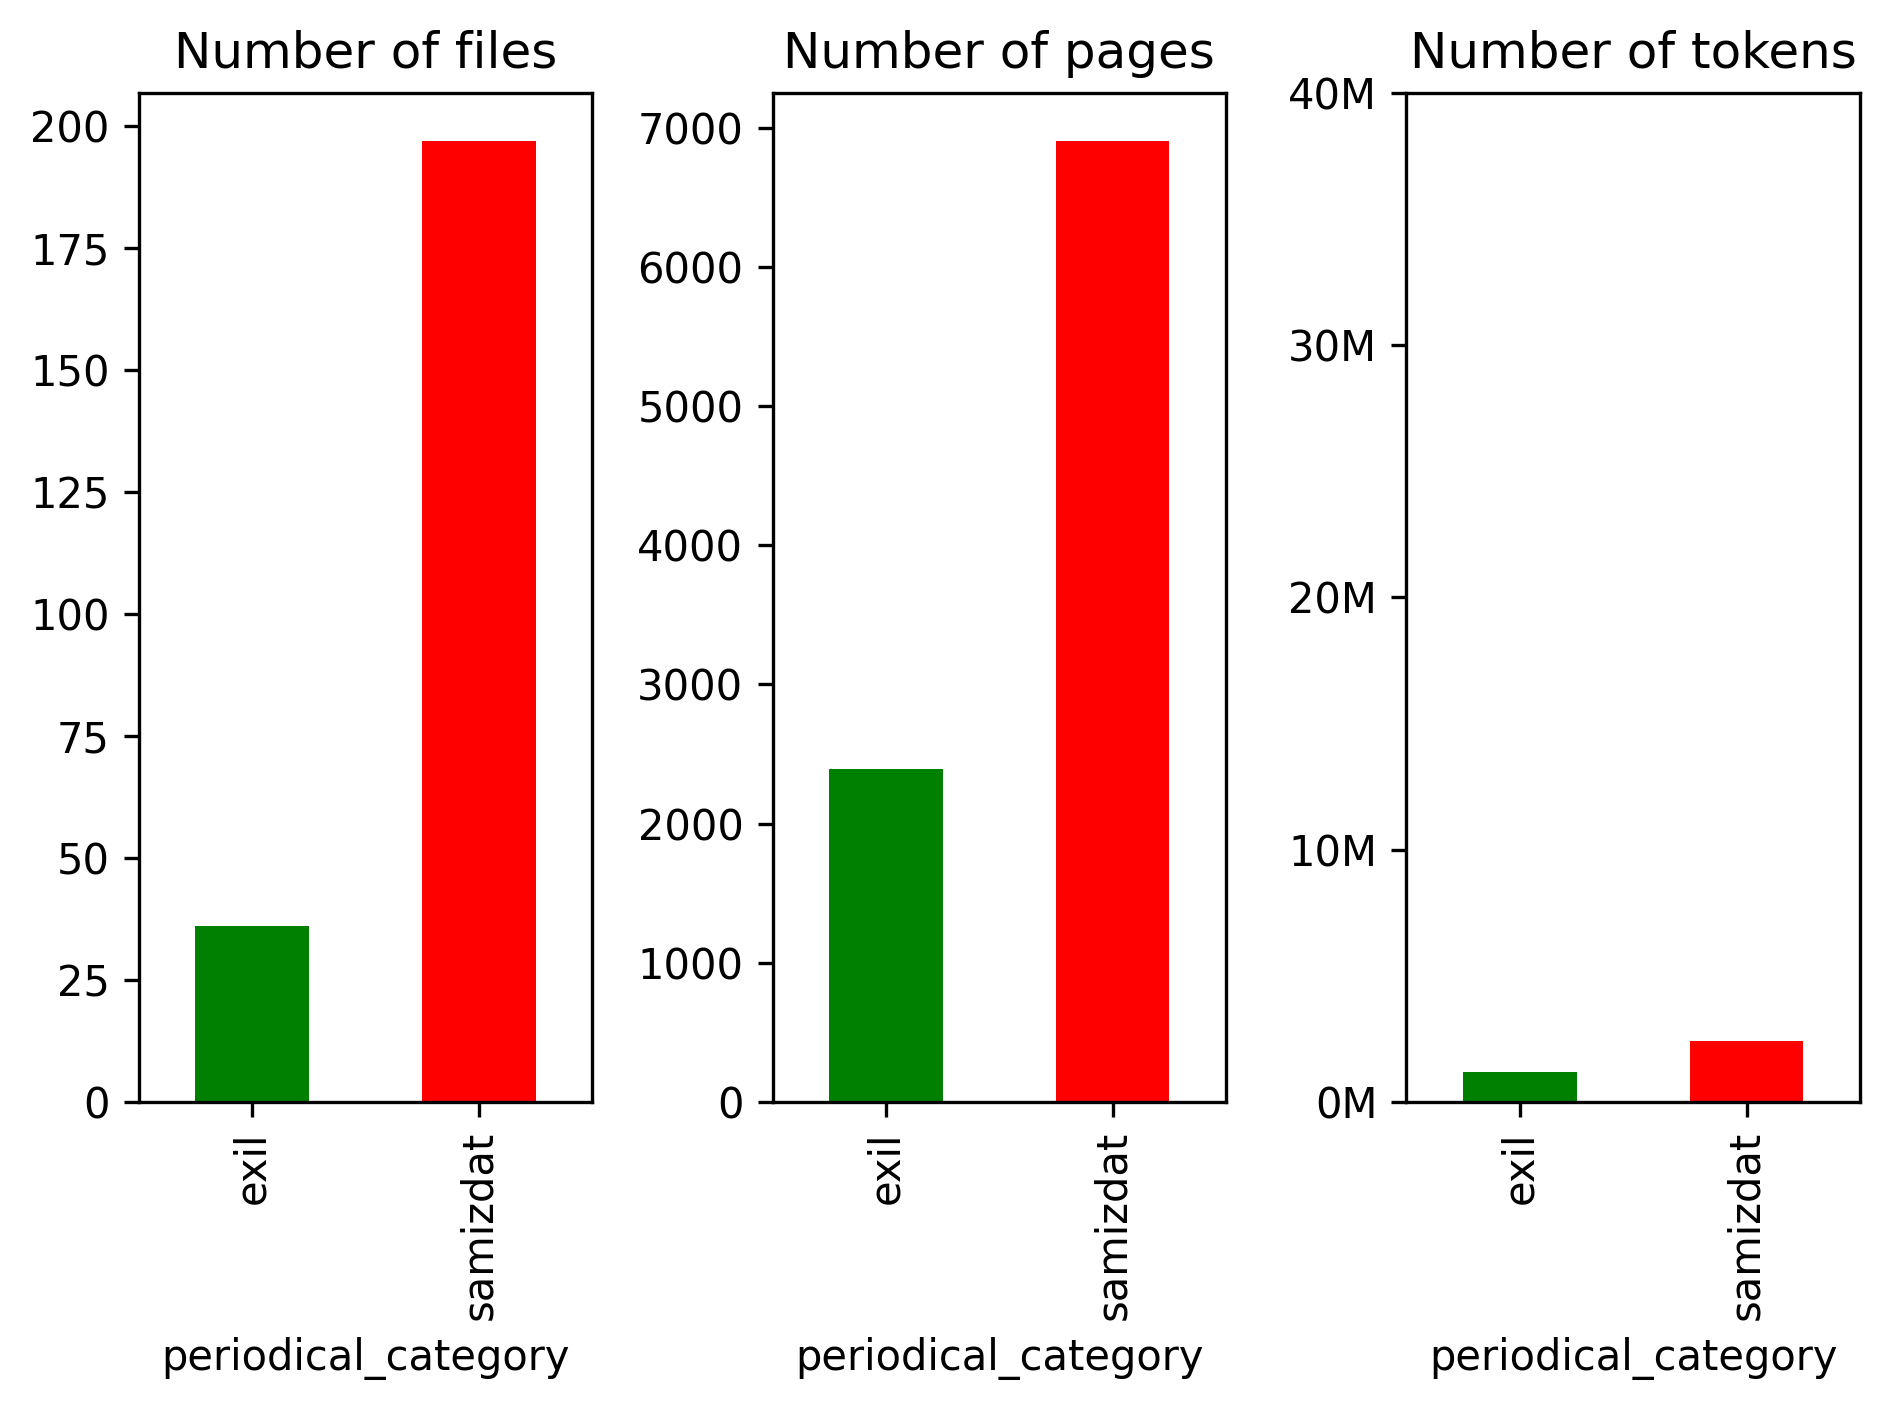

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, dpi=300, tight_layout=True)
scriptum_df[scriptum_df.year.isna()].groupby("periodical_category").size().plot(kind='bar', color=["green", "red"], ax=axs[0])
scriptum_df[scriptum_df.year.isna()].groupby("periodical_category")["pages_N"].sum().plot(kind='bar', color=["green", "red"], ax=axs[1])
scriptum_df[scriptum_df.year.isna()].groupby("periodical_category")["tokens_N"].sum().plot(kind='bar', color=["green", "red"], ax=axs[2])

axs[0].set_title("Number of files")
axs[1].set_title("Number of pages")
axs[2].set_title("Number of tokens")

N, M = 50, 10
axs[2].set_yticks(range(0, N * 1000000, M*1000000))
axs[2].set_yticklabels([str(n)+ "M" for n in range(0,N,M)])

In [33]:
scriptum_df

,periodical_category,periodical_href,periodical_title,periodical_basic_info,file_url,filename,year,pages_N,tokens_N
0,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1986_2_vina_ocr.txt,1986.0,36,24524
1,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1987_3_freud-a-psychoanalyza_ocr.txt,1987.0,42,21575
2,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1988_4_sluzba-zivotu_rok-blahoslavene-anez...,1988.0,25,14764
3,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1989_5_vira-v-modernim-svete_ocr.txt,1989.0,36,23867
4,samizdat,/cs/periodika/abecedni-casopis,Abecední časopis,"[, Praha , 1985 - 1986 , nepravidelně , ]",https://files.scriptum.cz/scriptum/abecedni-ca...,abecedni-casopis_1986_2_bonifac_tit-str-obsah_...,1986.0,2,87
...,...,...,...,...,...,...,...,...,...
11612,exil,/cs/periodika/zvon-new-york,Zvon (New York),"[, New Rochelle (New York City) , 1972 – , ...",https://files.scriptum.cz/scriptum/zvon-new-yo...,zvon_new-york_2004_08_ocr.txt,2004.0,8,4315
11613,exil,/cs/periodika/zvon-new-york,Zvon (New York),"[, New Rochelle (New York City) , 1972 – , ...",https://files.scriptum.cz/scriptum/zvon-new-yo...,zvon_new-york_2004_09_ocr.txt,2004.0,8,4598
11614,exil,/cs/periodika/zvon-new-york,Zvon (New York),"[, New Rochelle (New York City) , 1972 – , ...",https://files.scriptum.cz/scriptum/zvon-new-yo...,zvon_new-york_2004_10_ocr.txt,2004.0,8,3922
11615,exil,/cs/periodika/zvon-new-york,Zvon (New York),"[, New Rochelle (New York City) , 1972 – , ...",https://files.scriptum.cz/scriptum/zvon-new-yo...,zvon_new-york_2004_11_ocr.txt,2004.0,8,4354


([<matplotlib.axis.XTick at 0x11233f8e0>,
 [Text(1926, 0, '1926'),
  Text(1927, 0, '1927'),
  Text(1928, 0, '1928'),
  Text(1929, 0, '1929'),
  Text(1930, 0, '1930'),
  Text(1931, 0, '1931'),
  Text(1932, 0, '1932'),
  Text(1933, 0, '1933'),
  Text(1934, 0, '1934'),
  Text(1935, 0, '1935'),
  Text(1936, 0, '1936'),
  Text(1937, 0, '1937'),
  Text(1938, 0, '1938'),
  Text(1939, 0, '1939'),
  Text(1940, 0, '1940'),
  Text(1941, 0, '1941'),
  Text(1942, 0, '1942'),
  Text(1943, 0, '1943'),
  Text(1944, 0, '1944'),
  Text(1945, 0, '1945'),
  Text(1946, 0, '1946'),
  Text(1947, 0, '1947'),
  Text(1948, 0, '1948'),
  Text(1949, 0, '1949'),
  Text(1950, 0, '1950'),
  Text(1951, 0, '1951'),
  Text(1952, 0, '1952'),
  Text(1953, 0, '1953'),
  Text(1954, 0, '1954'),
  Text(1955, 0, '1955'),
  Text(1956, 0, '1956'),
  Text(1957, 0, '1957'),
  Text(1958, 0, '1958'),
  Text(1959, 0, '1959'),
  Text(1960, 0, '1960'),
  Text(1961, 0, '1961'),
  Text(1962, 0, '1962'),
  Text(1963, 0, '1963'),
  Text(1

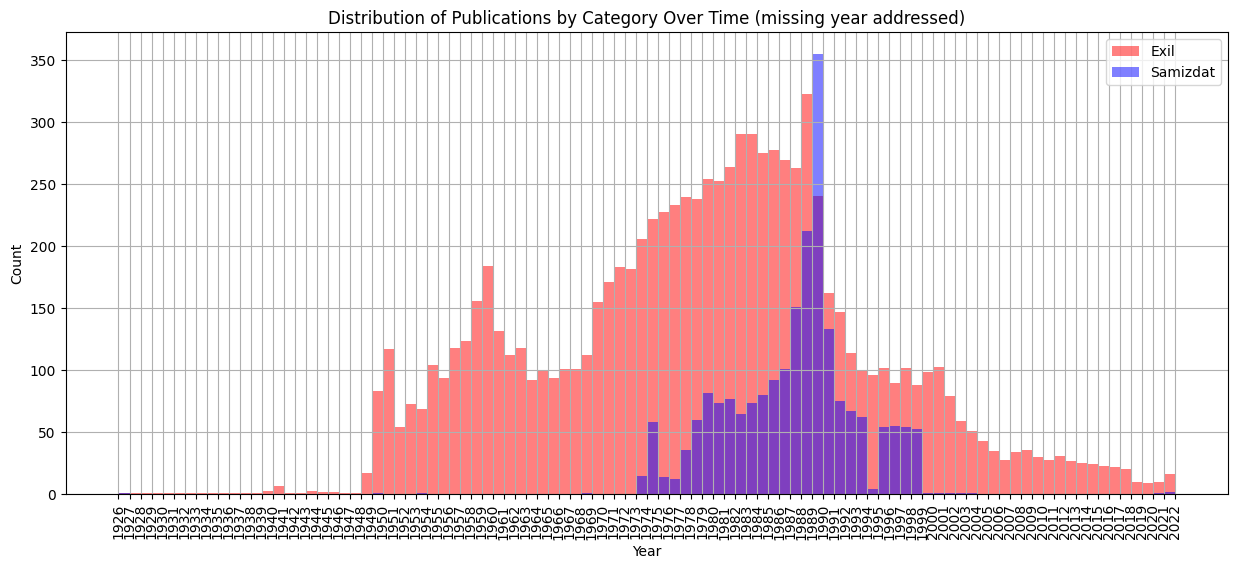

In [60]:
# Plot distribution of samizdat and exil over years
plt.figure(figsize=(15,6))
MIN_YEAR = int(scriptum_df[scriptum_df.periodical_category == 'samizdat'].year.min())
MAX_YEAR = int(scriptum_df[scriptum_df.periodical_category == 'samizdat'].year.max())
bins = range(MIN_YEAR, MAX_YEAR+1)

# Plot exil distribution
scriptum_df[scriptum_df.periodical_category == "exil"]["year"].hist(
    bins=bins,
    color="red", 
    alpha=0.5,
    label="Exil"
)

# Plot samizdat distribution
scriptum_df[scriptum_df.periodical_category == "samizdat"]["year"].hist(
    bins=bins, 
    color="blue", 
    alpha=0.5,
    label="Samizdat"
)

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Publications by Category Over Time (missing year addressed)")
plt.legend()
plt.xticks(bins, rotation=90)